Talvez, o modelo criado não consiga resultados tão bons porquê o pré-processamento realizou um "estrago" nos dados. Desta vez, vamos visualizar os novos dados e como eles separam as classes de OutcomeType.

O objetivo deste arquivo é avaliar o pré-processamento com a finalidade de formular hipóteses que expliquem o desempenho não tão bom dos modelos criados anteriormente.

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(arules)
library(rpart)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘arules’

The following object is masked from ‘package:dplyr’:

    recode

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
new_dt <- fread("train/Train_SVM.csv")
original_dt <- fread("train/train.csv")

In [3]:
original_dt <- original_dt[SexuponOutcome != '']
original_dt <- original_dt[AgeuponOutcome != '']
new_dt$OutcomeType <- original_dt$OutcomeType

In [4]:
head(new_dt, 5)

V1 Sex Castrated AgerangeuponOutcome Breed Mix_Breed AnimalType
1 1  1   1         -0.3                0.00  1         1         
2 2  0   1         -0.3                0.04  1         0         
3 3  1   1         -0.3                0.08  1         1         
4 4  1   0         -1.0                0.04  1         0         
5 5  1   1         -0.3                0.00  1         1         
  OutcomeType    
1 Return_to_owner
2 Euthanasia     
3 Adoption       
4 Transfer       
5 Transfer

## Sex

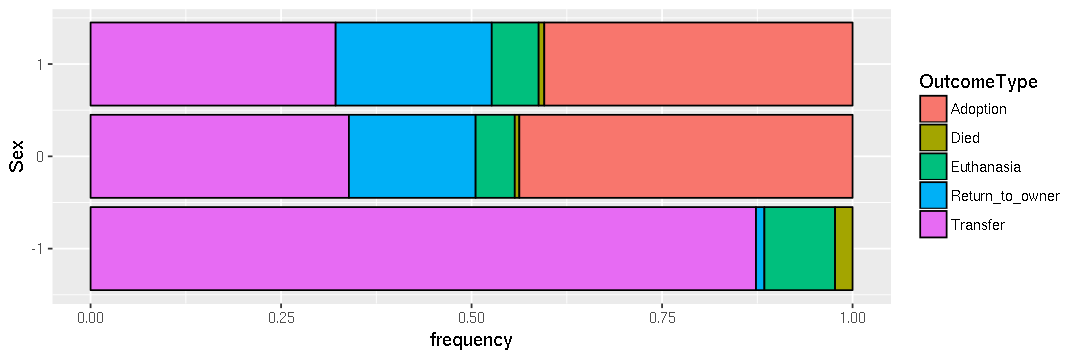

In [5]:
options(repr.plot.width=9, repr.plot.height=3)
outcomes <- new_dt[1:length(new_dt$Sex),] %>%
group_by(Sex, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = Sex, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Lembrando que Sex 1 significa Male, 0 é Female e -1 é Unknown.

Este atributo, conforme pode ser visto pelo gráfico, separa bem as classes de OutcomeType.

## Castrated

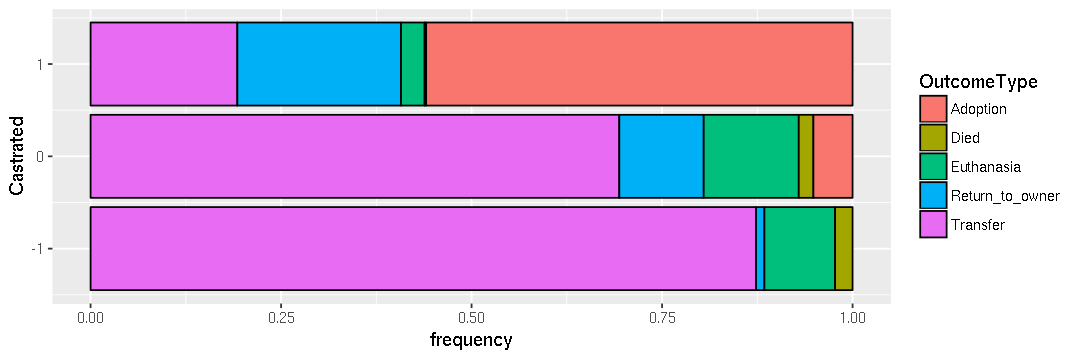

In [8]:
outcomes <- new_dt[1:length(new_dt$Castrated),] %>%
group_by(Castrated, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = Castrated, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Lembrando que 1 significa animal castrado, 0 animal intacto e -1 são os casos Unknown.

Este atributo, conforme pode ser visto pelo gráfico, separa bem as classes de OutcomeType.

## AgerangeuponOutcome

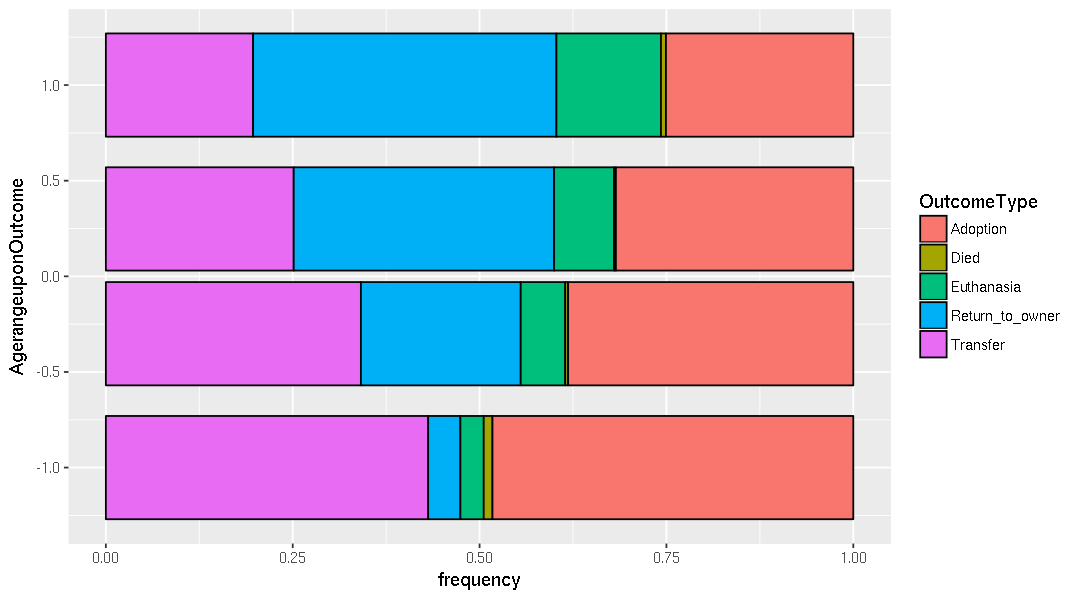

In [17]:
options(repr.plot.width=9, repr.plot.height=5)
outcomes <- new_dt[1:length(new_dt$AgerangeuponOutcome),] %>%
group_by(AgerangeuponOutcome, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = AgerangeuponOutcome, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Lembrando que -1 significa Baby, -0.3 é Teenager, 0.3 é Adult e 1 é Ancient.

Este atributo, conforme pode ser visto pelo gráfico, separa bem as classes de OutcomeType.

## Breed

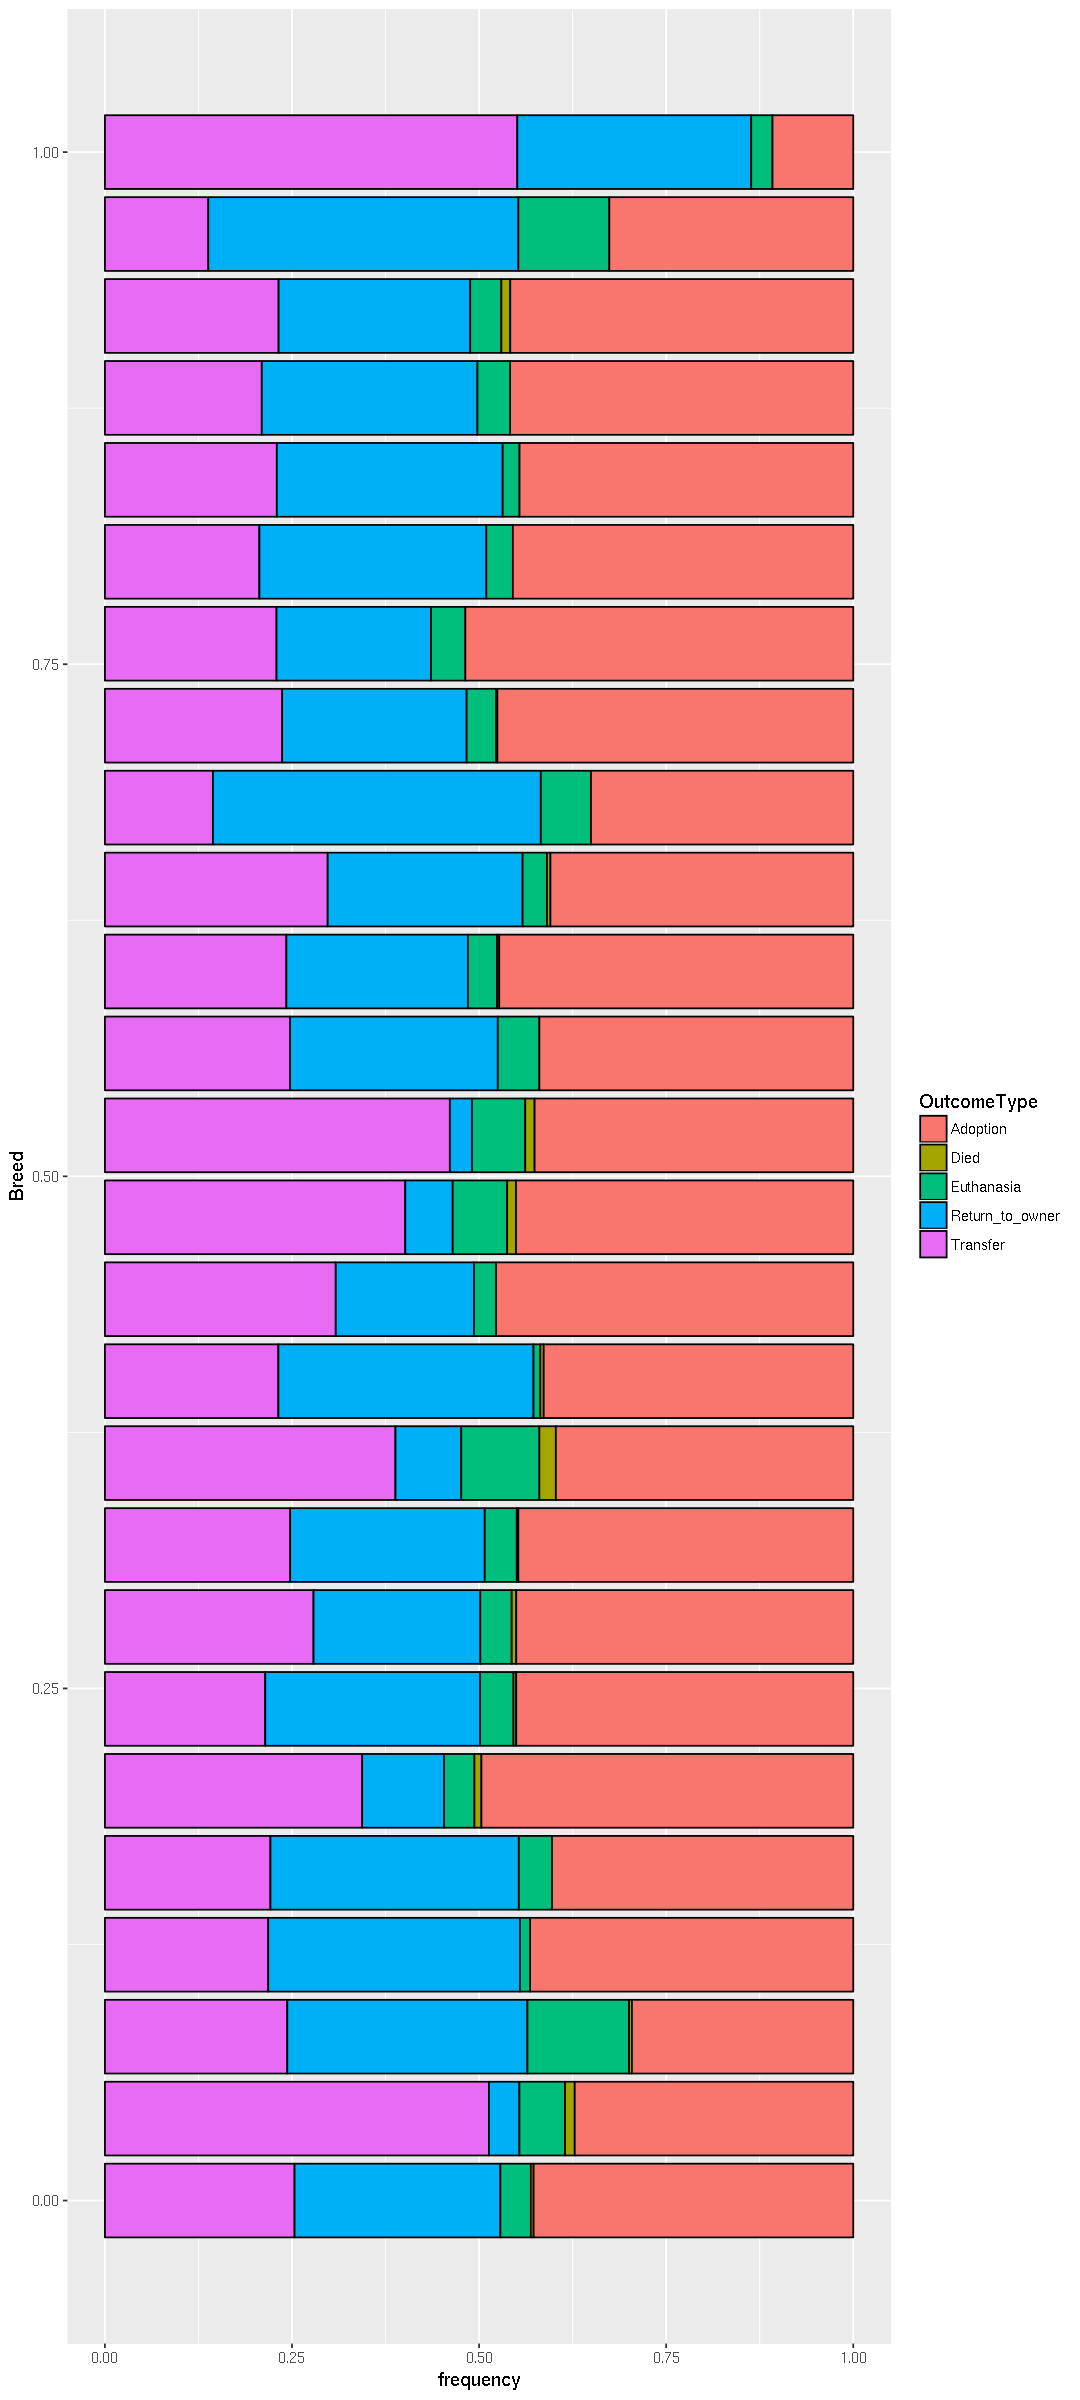

In [18]:
options(repr.plot.width=9, repr.plot.height=20)
outcomes <- new_dt[1:length(new_dt$Breed),] %>%
group_by(Breed, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = Breed, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Este atributo não é bom, pois possuem muitas classes. Por isso, um pré-processamento na base de dados original será refeito, filtrando por uma frequência ainda maior, com a finalidade de reduzir a quantidade de classes.

## Mix_Breed

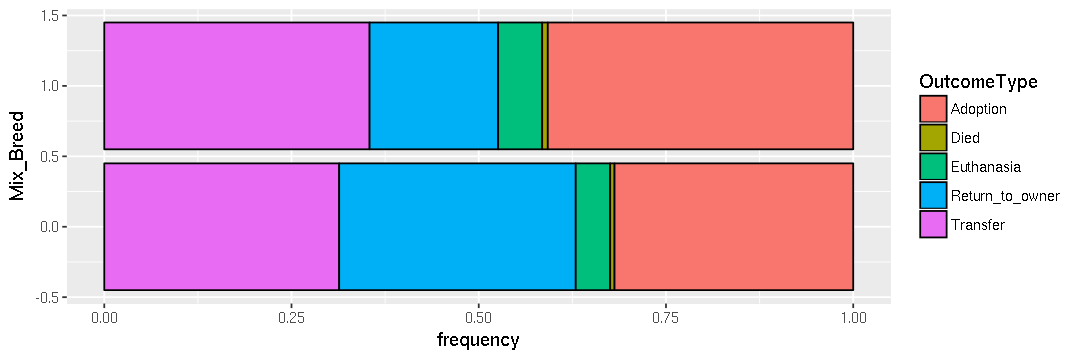

In [19]:
options(repr.plot.width=9, repr.plot.height=3)
outcomes <- new_dt[1:length(new_dt$Mix_Breed),] %>%
group_by(Mix_Breed, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = Mix_Breed, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Lembrando que 0 significa raça pura e 1 impura.

Este atributo, conforme pode ser visto pelo gráfico, separa bem as classes de OutcomeType.

## AnimalType

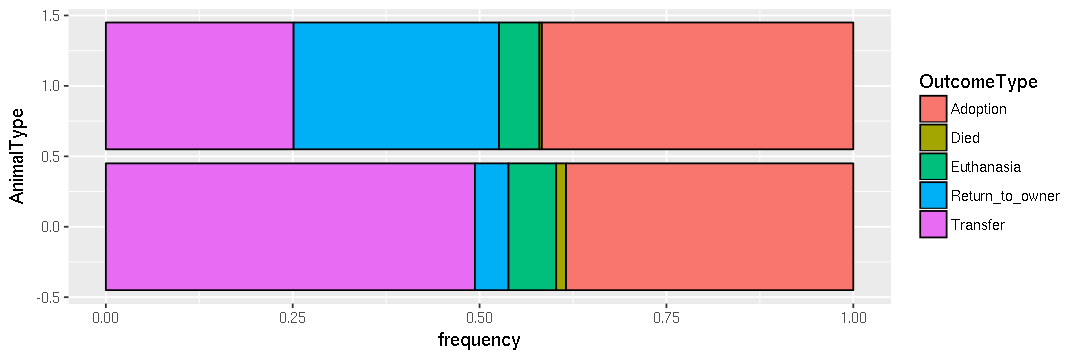

In [20]:
outcomes <- new_dt[1:length(new_dt$AnimalType),] %>%
group_by(AnimalType, OutcomeType) %>%
summarise(frequency = n())
ggplot(outcomes, aes(x = AnimalType, y = frequency, fill = OutcomeType)) + geom_bar(stat = 'identity', position = 'fill', colour = 'black') + coord_flip()

Lembrando que 1 significa Dog e 0 Cat.

Este atributo, conforme pode ser visto pelo gráfico, separa bem as classes de OutcomeType.

Além do que já foi ressaltado, vale destacar que talvez o atributo Name tenha alguma importância. Repensando sobre o caso, se uma pessoa tenta resgatar um animal da qual ela deixou no abrigo, e este animal ainda não possui um nome, algo estranho está acontecendo. Além disso, animais de rua podem ter sido levados ao abrigo. Desta forma, não haverá nenhuma informação sobre o passado do animal (o que é levado em consideração por quem adota), inclusive não haverá nome.